<a href="https://colab.research.google.com/github/jimioke/groupstackbar/blob/master/group_stack_bar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# S/E/I/R : 4 bars in each group
# each group is one week; 3 weeks
# age cat 1 to 5; 5 categories vertically in each bar

# csv format input 
# each row has three keys which together identify the row uniquely (age; week; SEIR)


# generate dummy data
with open('dummy_data.csv','w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerow(['Week','State_SEIR','Age_Cat','Value'])
    for i in ['Week 1', 'Week 2', 'Week 3']: # 3 weeks
        for j in ['S','E','I','R']:
            for k in ['Age Cat 1', 'Age Cat 2', 'Age Cat 3', 'Age Cat 4', 'Age Cat 5']:
                csvwriter.writerow([i,j,k, int(random.random()*100)])




In [44]:


### To-DO handle missing data

import matplotlib.pyplot as plt
import csv
import random
import sys
import os





"""
Arguments: 

N:
  Number of colors in the map

type: 
  Types of colormap. 
  Currently two values are being accepted. 
  (1)'sequential' case-insensitive; 'S' or 's' can also be passed
  (2)'qualitative' case-insensitive; 'Q' or 'q' can also be passed


Returns:
  a list of colors with N levels; seq/qual based on type
"""
def getColorMaps(N=10, type='sequential'):
    N += 1 # handling the boundary case- we will fix this later. Since we run the loops till N-1 

    if type in ['sequential' ,'S' ,'s' , 'Sequential']:
        # generating a random starting point
        startPoint = (random.random(), random.random(), random.random())

        # choose a random axis 
        r = int(random.random() // 0.3333)
        color_list = []
        zeros = [0,0,0]

        zeros[0] = startPoint[0]
        zeros[1] = startPoint[1]
        zeros[2] = startPoint[2]
        zeros[r] = 0 #startPoint[r]

        for i in range(N-1):
            zeros[r] += ((1)/N)
            color_list.append(tuple(zeros))
        return color_list
    
    elif type in ['qualitative' ,'Q' ,'q' , 'Qualitative']:
        # generating a random starting point
        color_list = [] 
        for i in range(N-1):
            color_list.append(tuple([random.random(), random.random(), random.random()]))
        return color_list
    
    else:
        print ("Invalid argument for colormap passed! \n Exiting script")
        sys.exit()

    

"""
Arguments: 
filename: 
  a csv filename with 4 headers, H1, H2, H3 and H4. Each one of H1/H2/H3/H4 are strings.
  the first three headers(H1/H2/H3) should identify a row uniquely 
  the fourth header H4 contains the value (H4 must be integer or floating; cannot be a string)
  .csv iles without headers will result in the first row being read as headers. 

duplicates:
  a binary argument (True/False) to specify if the filename contains 
  duplicate entries (i.e.) two rows with same <H1/H2/H3> identifier. If duplicates is True, 
  we perform aggregation before proceeding

BGV:a python list of three headers in order for stacking (Bar, Groups and Vertical Stacking)
  for example, if BGV=[H2, H1, H3], the group stack plot will be such that:
    maximum number of bars = number of unique values under column H2
    maximum number of bars group together horizontally(side-by-side) = number of 
                                                unique values under column H1
    maximum number of vertical stacks in any bar = number of unique values under column H2

"""
def plot_grouped_stacks(filename, BGV):
    fileread_list = []
    with open(filename) as f:
        c = 1 
        for row in f:
            c += 1  # counting line number in file for error reporting
            r = row.strip().split(',')    
            if len(r) != 4:
                print ('4 items not found @ line ', c, ' of ', filename)
                sys.exit()
            else:
                fileread_list.append(r) # reading the file as a list of lists
                # in order to reduce repetitive disk access later
                # the content of the file at any line L can be later read as fileread_list[L]

        
    # inputs: 
    bar_variable = BGV[0]
    group_variable = BGV[1]
    vertical_stacking_variable = BGV[2]

    first_line = fileread_list[0]
    for i in range(4):
        if first_line[i] == vertical_stacking_variable:
            hedader_num_Of_vertical_stacking = i
            break
    
    sorted_order_for_stacking = []
    for listed in fileread_list[1:]:  # skipping the first line
        sorted_order_for_stacking.append(listed[hedader_num_Of_vertical_stacking])
    sorted_order_for_stacking = list(set(sorted_order_for_stacking))
    list.sort(sorted_order_for_stacking)
    sorted_order_for_stacking_V = list(sorted_order_for_stacking)
    #####################

    first_line = fileread_list[0]
    for i in range(4):
        if first_line[i] == bar_variable:
            hedader_num_Of_bar_Variable = i
            break
    
    sorted_order_for_stacking = []
    for listed in fileread_list[1:]:  # skipping the first line
        sorted_order_for_stacking.append(listed[hedader_num_Of_bar_Variable])
    sorted_order_for_stacking = list(set(sorted_order_for_stacking))
    list.sort(sorted_order_for_stacking)
    sorted_order_for_stacking_B = list(sorted_order_for_stacking)
    ######################
    
    first_line = fileread_list[0]
    for i in range(4):
        if first_line[i] == group_variable:
            hedader_num_Of_bar_Variable = i
            break
    
    sorted_order_for_stacking = []
    for listed in fileread_list[1:]:  # skipping the first line
        sorted_order_for_stacking.append(listed[hedader_num_Of_bar_Variable])
    sorted_order_for_stacking = list(set(sorted_order_for_stacking))
    list.sort(sorted_order_for_stacking)
    sorted_order_for_stacking_G = list(sorted_order_for_stacking)
    #########################   

    print (" Get three maps ")
    print (sorted_order_for_stacking_V)
    print (sorted_order_for_stacking_B)
    print (sorted_order_for_stacking_G)

    # colormaps 
    number_of_color_maps_needed = len(sorted_order_for_stacking_B)
    number_of_levels_in_each_map = len(sorted_order_for_stacking_V)
    c_map_vertical = {}
    
    for i in range(number_of_color_maps_needed):
        c_map_vertical[sorted_order_for_stacking_B[i]] = getColorMaps(N = number_of_levels_in_each_map, type = 'S')

    ## 
    width = 0.5
    first_offset = 2

    state_num = -1
    for state in sorted_order_for_stacking_B:
        state_num += 1
        week_num = -1
        for week in ['Week 1', 'Week 2','Week 3']:
            week_num += 1

            a = [0] * len(sorted_order_for_stacking_V)
            for i in range(len(sorted_order_for_stacking_V)):

                for line_num in range(1,len(fileread_list)):  # skipping the first line
                    listed = fileread_list[line_num]

                    if listed[1] == state and listed[0] == week and listed[2] == sorted_order_for_stacking_V[i]:
                        a[i]= (float(listed[3]))
            
            # get cumulative values
            cum_val = [a[0]]
            for j in range(1,len(a)):
                cum_val.append( cum_val[j-1] + a[j] )

            # trick to make them all visible: Plot in descending order of their height!! :) 
            for i in range(len(sorted_order_for_stacking_V)-1,-1,-1):
                plt.bar(first_offset + week_num*5 + state_num*width*1.5, height=cum_val[i] , width=width, color=c_map_vertical[state][i])
    plt.show()



 Get three maps 
['Age Cat 1', 'Age Cat 2', 'Age Cat 3', 'Age Cat 4', 'Age Cat 5']
['E', 'I', 'R', 'S']
['Week 1', 'Week 2', 'Week 3']


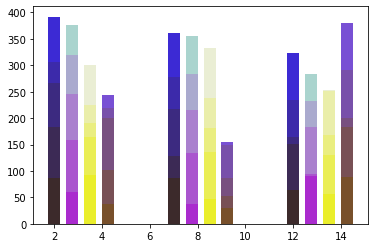

In [45]:
plot_grouped_stacks('dummy_data.csv', BGV=['State_SEIR','Week','Age_Cat'])